[{'v': 0.01, 'x': 0.0, 'b': [0, 0, 0, 0, 0]}, {'v': 0.01, 'x': 0.1, 'b': [0, 0, 0, 0, 0]}, {'v': 0.01, 'x': 0.2, 'b': [0, 0, 0, 0, 0]}, {'v': 0.01, 'x': 0.3, 'b': [0, 0, 0, 0, 0]}, {'v': 0.01, 'x': 0.4, 'b': [0, 0, 0, 0, 0]}, {'v': 0.01, 'x': 0.5, 'b': [0, 0, 0, 0, 0]}, {'v': 0.01, 'x': 0.6, 'b': [0, 0, 0, 0, 0]}, {'v': 0.01, 'x': 0.7, 'b': [0, 0, 0, 0, 0]}, {'v': 0.01, 'x': 0.8, 'b': [0, 0, 0, 0, 0]}, {'v': 0.01, 'x': 0.9, 'b': [0, 0, 0, 0, 0]}]


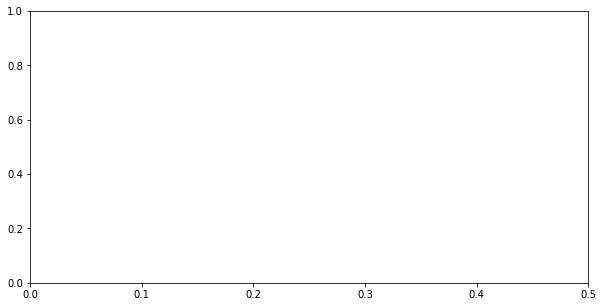

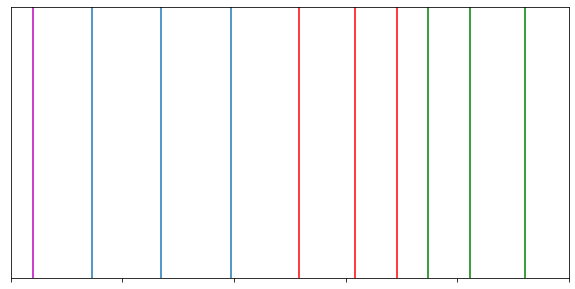

In [14]:
# model params: reaction time, avg speed, following distance, "disruption severity". 
# The effect on speed from braking is linear

# LINE OF CARS
%matplotlib inline
import math
import copy
import matplotlib.pyplot as plt
plt.rcParams["animation.html"] = "html5"
from matplotlib.animation import FuncAnimation
import time
import json

# reds = matplotlib.cm.get_cmap('Reds')
# greens = matplotlib.cm.get_cmap('Greens')
t1 = time.time()
# rgba = cmap(0.5)

# cars = []
n = 10
# reaction_time = 5
cars = []
for i in range(n):
    cars.append({
        'v': 0.01,
#         'd': 1/n,
        'x': i/n,
#         'b': 0,
        'b': [0] * 5,
#         'r': 5
    })

print(cars)

plt.rcParams['figure.figsize'] = (10,5)
plt.xlim([0,0.5])
fig, ax = plt.subplots()
# cars_old = []
# print('d')

ts = range(20,50)
bs = [-0.001]*15 + [0.001]*15

braker = 1
time_series = []
time_series2 = []
def animate(i):
    time_series2.append(copy.deepcopy(cars))
    time_series.append([c['x'] for c in cars])
#     print(time_series)
    cars_old = copy.deepcopy(cars)
#     print(i)
#     print('hello??')
    ax.clear()
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    
    for j, car in enumerate(cars):
#         print(j)
        if j == braker and cars[j]['b'][-1] == 0 and i < ts[0]:
            ax.axvline(x=car['x']%1, color='m')
        elif cars[j]['b'][-1] > 0:
            ax.axvline(x=car['x']%1, color='g')
        elif cars[j]['b'][-1] < 0:
            ax.axvline(x=car['x']%1, color='r')
        else:
            ax.axvline(x=car['x']%1)
        
        cars[j]['x'] = car['x'] + car['v']
#         if car['b']:
        cars[j]['v'] += cars[j]['b'][-1]
        if cars[j]['v'] < 0:
            cars[j]['v'] = 0
            
        cars[j]['b'] = [0] + car['b'][:-1]
    
        cars[j]['b'][0] = cars[(j+1)%n]['b'][-1]

        if j == braker and i in ts:
            cars[j]['b'][-1] = bs[i - ts[0]]
            
#         if j == braker:
#             print(cars[j]['b'])
            
            
# animate(1)

ani = FuncAnimation(fig, animate, frames=200, interval=30)
ani

[{'v': 0.005, 'x': 0.0, 'b': 0}, {'v': 0.005, 'x': 0.03333333333333333, 'b': 0}, {'v': 0.005, 'x': 0.06666666666666667, 'b': 0}, {'v': 0.005, 'x': 0.1, 'b': 0}, {'v': 0.005, 'x': 0.13333333333333333, 'b': 0}, {'v': 0.005, 'x': 0.16666666666666666, 'b': 0}, {'v': 0.005, 'x': 0.2, 'b': 0}, {'v': 0.005, 'x': 0.23333333333333334, 'b': 0}, {'v': 0.005, 'x': 0.26666666666666666, 'b': 0}, {'v': 0.005, 'x': 0.3, 'b': 0}, {'v': 0.005, 'x': 0.3333333333333333, 'b': 0}, {'v': 0.005, 'x': 0.36666666666666664, 'b': 0}, {'v': 0.005, 'x': 0.4, 'b': 0}, {'v': 0.005, 'x': 0.43333333333333335, 'b': 0}, {'v': 0.005, 'x': 0.4666666666666667, 'b': 0}, {'v': 0.005, 'x': 0.5, 'b': 0}, {'v': 0.005, 'x': 0.5333333333333333, 'b': 0}, {'v': 0.005, 'x': 0.5666666666666667, 'b': 0}, {'v': 0.005, 'x': 0.6, 'b': 0}, {'v': 0.005, 'x': 0.6333333333333333, 'b': 0}, {'v': 0.005, 'x': 0.6666666666666666, 'b': 0}, {'v': 0.005, 'x': 0.7, 'b': 0}, {'v': 0.005, 'x': 0.7333333333333333, 'b': 0}, {'v': 0.005, 'x': 0.7666666666

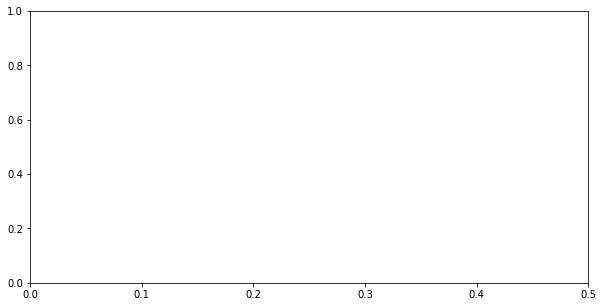

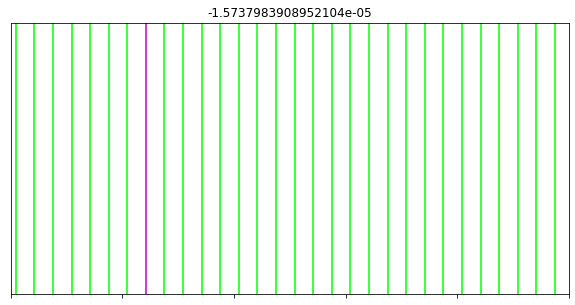

In [111]:
# model params: reaction time, avg speed, following distance, "disruption severity". 
# The effect on speed from braking is linear

# LINE OF CARS
%matplotlib inline
import math
import copy
import matplotlib.pyplot as plt
plt.rcParams["animation.html"] = "html5"
from matplotlib.animation import FuncAnimation
import time
import json
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap

colors = [(1, 0, 0), (0, 0, 1), (0, 1, 0)]  # R -> G -> B
cmap = LinearSegmentedColormap.from_list(name='bruh', colors=colors, N=100)

# reds = matplotlib.cm.get_cmap('Reds')
# greens = matplotlib.cm.get_cmap('Greens')
t1 = time.time()
# rgba = cmap(0.5)

# cars = []
n = 30
# reaction_time = 5
cars = []
for i in range(n):
    cars.append({
        'v': 0.005,
#         'd': 1/n,
        'x': i/n,
#         'b': 0,
        'b': 0,
#         'r': 5
    })

print(cars)

plt.rcParams['figure.figsize'] = (10,5)
plt.xlim([0,0.5])
fig, ax = plt.subplots()
# cars_old = []
# print('d')

ts = range(5,12)
braker_val = .0005
bs = [-braker_val]*4 + [braker_val]*3
a = .01
b = .1

braker = 1
time_series = []
time_series2 = []
crash = False
stop_on_crash = False
max_b = 0
b_upper_bound = 0.00004
b_lower_bound = 0.00004
def animate(i):
    global crash
    if not crash or not stop_on_crash:
        print(i, end='\r')
#         print(cars)
        time_series2.append(copy.deepcopy(cars))
        time_series.append([c['x'] for c in cars])
    #     print(time_series)
        cars_old = copy.deepcopy(cars)
    #     print(i)
    #     print('hello??')
        # graph params
        ax.clear()
        ax.set_yticks([])
        ax.set_yticklabels([])
        ax.set_xticklabels([])

        for j, car in enumerate(cars):
            global max_b
    #         print(j)
            # highlight the braker and color the rest by acceleration
#             if j == braker and cars[j]['b'] == 0 and i < ts[0]:
#                 ax.axvline(x=car['x']%1, color='m')
#             elif cars[j]['b'] > 0:
#                 ax.axvline(x=car['x']%1, color='g')
#             elif cars[j]['b'] < 0:
#                 ax.axvline(x=car['x']%1, color='r')
#             else:
#                 ax.axvline(x=car['x']%1)
#             print(car['b'])
#             print(abs(car['b']) > max_b)
#             print(car['b'])
#             print(max_b)
            if abs(car['b']) > max_b and not abs(car['b']) == braker_val:
                max_b = abs(car['b'])
#             print(car['b'])
#             print(cmap((car['b']+upper_bound)/upper_bound*2))

            if j == 3:
                ax.axvline(x=car['x']%1, color='m')
                ax.set_title(car['b'])
            else:
                ax.axvline(x=car['x']%1, color=cmap((car['b']+b_lower_bound)/b_upper_bound*2))

            # update x position
            cars[j]['x'] = car['x'] + car['v']
            # update velocity. b is braking, and the length of its array determines the reaction time.
            cars[j]['v'] += cars[j]['b']
            # don't go backwards, just stop
            if cars[j]['v'] < 0:
                cars[j]['v'] = 0

            # propagate braking 1 step down the array
    #         cars[j]['b'] = [0] + car['b'][:-1]

            # this is the key step: update braking value
    #         cars[j]['b'][0] = cars[(j+1)%n]['b'][-1]

            if j+1 == n:
                delta_x = 1 + cars[0]['x'] - car['x']
            else:
                delta_x = cars[j+1]['x'] - car['x']

            if delta_x < 0:
                crash = True

            cars[j]['b'] = a * (b * math.tanh(delta_x) - car['v'])
    #         cars[j]['b'] = a * (math.tanh(delta_x - 2) + math.tanh(2) - car['v'])

            # braker to initiate wave
#             if j == braker and i in ts:
#                 cars[j]['b'] = bs[i - ts[0]]
            

ani = FuncAnimation(fig, animate, frames=30, interval=30)
ani

In [ ]:
# model params: reaction time, avg speed, following distance, "disruption severity". 
# The effect on speed from braking is linear

# LINE OF CARS
%matplotlib inline
import math
import copy
import matplotlib.pyplot as plt
plt.rcParams["animation.html"] = "html5"
from matplotlib.animation import FuncAnimation
import time
import json
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap

colors = [(1, 0, 0), (0, 0, 1), (0, 1, 0)]  # R -> G -> B
cmap = LinearSegmentedColormap.from_list(name='bruh', colors=colors, N=100)

# reds = matplotlib.cm.get_cmap('Reds')
# greens = matplotlib.cm.get_cmap('Greens')
t1 = time.time()
# rgba = cmap(0.5)

# cars = []
n = 30
# reaction_time = 5
cars = []
for i in range(n):
    cars.append({
        'v': 0.005,
#         'd': 1/n,
        'x': i/n,
#         'b': 0,
        'b': 0,
#         'r': 5
    })

print(cars)

plt.rcParams['figure.figsize'] = (10,5)
plt.xlim([0,0.5])
fig, ax = plt.subplots()
# cars_old = []
# print('d')

ts = range(5,12)
braker_val = .0005
bs = [-braker_val]*4 + [braker_val]*3
a = .01
b = .1

braker = 1
time_series = []
time_series2 = []
crash = False
stop_on_crash = False
max_b = 0
b_upper_bound = 0.00004
b_lower_bound = 0.00004
for i, frame in enumerate(time_series2):
    print(i, end='\r')
#         print(cars)
    # graph params
    ax.clear()
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    for j, car in enumerate(frame):
        global max_b
#         print(j)
        # highlight the braker and color the rest by acceleration
#             if j == braker and cars[j]['b'] == 0 and i < ts[0]:
#                 ax.axvline(x=car['x']%1, color='m')
#             elif cars[j]['b'] > 0:
#                 ax.axvline(x=car['x']%1, color='g')
#             elif cars[j]['b'] < 0:
#                 ax.axvline(x=car['x']%1, color='r')
#             else:
#                 ax.axvline(x=car['x']%1)
#             print(car['b'])
#             print(abs(car['b']) > max_b)
#             print(car['b'])
#             print(max_b)
        if abs(car['b']) > max_b and not abs(car['b']) == braker_val:
            max_b = abs(car['b'])
#             print(car['b'])
#             print(cmap((car['b']+upper_bound)/upper_bound*2))

        if j == 3:
            ax.axvline(x=car['x']%1, color='m')
            ax.set_title(car['b'])
        else:
            ax.axvline(x=car['x']%1, color=cmap((car['b']+b_lower_bound)/b_upper_bound*2))

        # update x position
        cars[j]['x'] = car['x'] + car['v']
        # update velocity. b is braking, and the length of its array determines the reaction time.
        cars[j]['v'] += cars[j]['b']
        # don't go backwards, just stop
        if cars[j]['v'] < 0:
            cars[j]['v'] = 0

        # propagate braking 1 step down the array
#         cars[j]['b'] = [0] + car['b'][:-1]

        # this is the key step: update braking value
#         cars[j]['b'][0] = cars[(j+1)%n]['b'][-1]

        if j+1 == n:
            delta_x = 1 + cars[0]['x'] - car['x']
        else:
            delta_x = cars[j+1]['x'] - car['x']

        if delta_x < 0:
            crash = True

        cars[j]['b'] = a * (b * math.tanh(delta_x) - car['v'])
#         cars[j]['b'] = a * (math.tanh(delta_x - 2) + math.tanh(2) - car['v'])

        # braker to initiate wave
#             if j == braker and i in ts:
#                 cars[j]['b'] = bs[i - ts[0]]
            

ani = FuncAnimation(fig, animate, frames=30, interval=30)
ani

In [112]:
max_b

2.1674246022983913e-05

In [113]:
time_series2

[[{'v': 0.005, 'x': 0.0, 'b': 0},
  {'v': 0.005, 'x': 0.03333333333333333, 'b': 0},
  {'v': 0.005, 'x': 0.06666666666666667, 'b': 0},
  {'v': 0.005, 'x': 0.1, 'b': 0},
  {'v': 0.005, 'x': 0.13333333333333333, 'b': 0},
  {'v': 0.005, 'x': 0.16666666666666666, 'b': 0},
  {'v': 0.005, 'x': 0.2, 'b': 0},
  {'v': 0.005, 'x': 0.23333333333333334, 'b': 0},
  {'v': 0.005, 'x': 0.26666666666666666, 'b': 0},
  {'v': 0.005, 'x': 0.3, 'b': 0},
  {'v': 0.005, 'x': 0.3333333333333333, 'b': 0},
  {'v': 0.005, 'x': 0.36666666666666664, 'b': 0},
  {'v': 0.005, 'x': 0.4, 'b': 0},
  {'v': 0.005, 'x': 0.43333333333333335, 'b': 0},
  {'v': 0.005, 'x': 0.4666666666666667, 'b': 0},
  {'v': 0.005, 'x': 0.5, 'b': 0},
  {'v': 0.005, 'x': 0.5333333333333333, 'b': 0},
  {'v': 0.005, 'x': 0.5666666666666667, 'b': 0},
  {'v': 0.005, 'x': 0.6, 'b': 0},
  {'v': 0.005, 'x': 0.6333333333333333, 'b': 0},
  {'v': 0.005, 'x': 0.6666666666666666, 'b': 0},
  {'v': 0.005, 'x': 0.7, 'b': 0},
  {'v': 0.005, 'x': 0.733333333333

In [2]:
print('_____________')
print('_____________')

# print('b')
print('saving/displaying')
# plt.show()
# ani.save('animation.mp4')
print(time.time() - t1)
with open('time_series.json', 'w') as f:
    json.dump(time_series, f)
# ani

_____________
_____________
saving/displaying
42.81901407241821


In [16]:
time_series = time_series2

In [ ]:
time_series2

Text(0.5, 0, 'x')

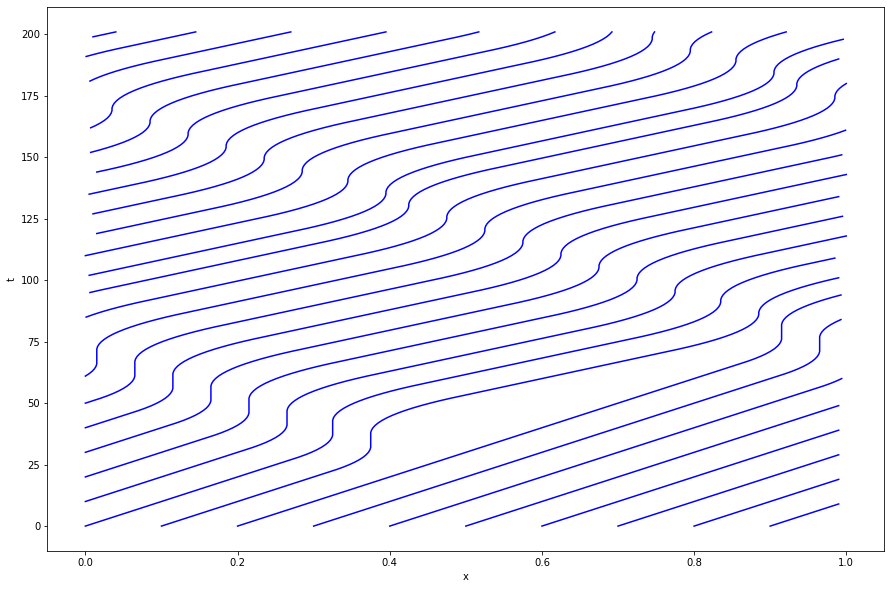

In [31]:
plot_x = []
plot_y = []
trajectories = []
for i in range(5*n):
    trajectories.append([[],[],[]])
for t,t_x in enumerate(time_series):
    for i,car in enumerate(t_x):
#         print(i)
#         print(x)
#         print(t)
#         print('_______')
#         print(car['x'])
#         print(math.floor(car['x']))
#         print(n)
        new_i = i + n*math.floor(car['x'])
#         print(new_i)
#         print(len(trajectories))
#         if new_i >= len(trajectories):
#             trajectories.append([[], []])
        trajectories[new_i][0].append(car['x']%1)
        trajectories[new_i][1].append(t)
        trajectories[new_i][2].append(car['b'][-1])
#         plot_x.append(x%1)
#         plot_y.append(t)
    
for traj in trajectories:
    plt.plot(traj[0], traj[1],
             c='b'
            )
# print(trajectories[1])
# plt.plot(trajectories[0][0], trajectories[0][1])
    
plt.rcParams['figure.figsize'] = (15,10)
# plt.scatter(plot_x, plot_y, marker='s')
plt.ylabel('t')
plt.xlabel('x')

Text(0.5, 0, 'x')

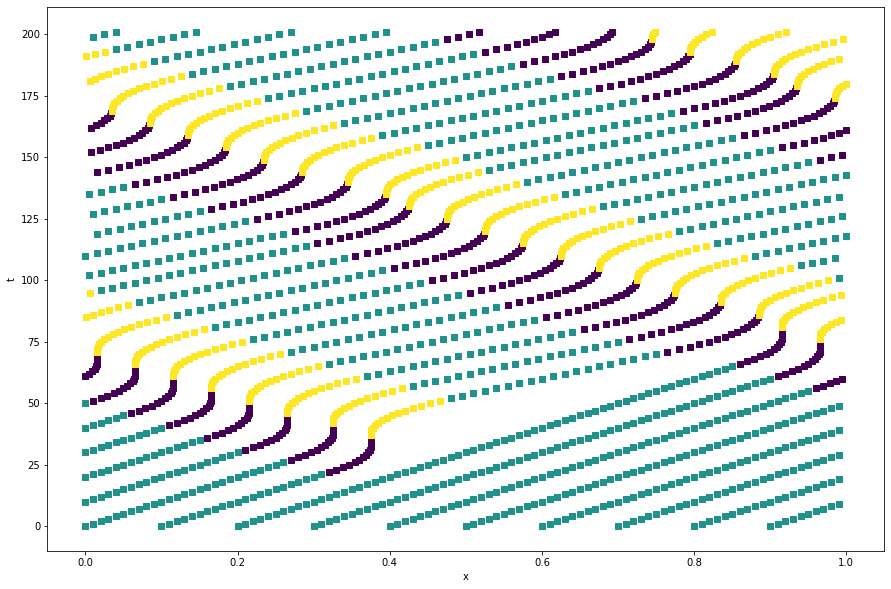

In [32]:
plot_x = []
plot_y = []
plot_c = []
for t,t_x in enumerate(time_series):
    for i,c in enumerate(t_x):
        plot_x.append(c['x']%1)
        plot_y.append(t)
        plot_c.append(c['b'][-1])
    
    
plt.rcParams['figure.figsize'] = (15,10)
plt.scatter(plot_x, plot_y, marker='s', c=plot_c)
plt.ylabel('t')
plt.xlabel('x')